In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = np.load('Data.npz')

In [3]:
dataset = dataset.f.arr_0

In [4]:
dataset

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
dataset.shape

(1797, 64)

In [6]:
X = dataset.T
X.shape

(64, 1797)

In [7]:
x_bar = np.mean(X, axis = 1)

In [8]:
x_bar.shape

(64,)

In [9]:
(X-x_bar[:,np.newaxis]).shape

(64, 1797)

In [10]:
S = (1/X.shape[1])*np.matmul(X-x_bar[:, np.newaxis], (X-x_bar[:, np.newaxis]).T)

In [11]:
S.shape

(64, 64)

In [12]:
w, v = np.linalg.eig(S)

In [13]:
w

array([1.78907316e+02, 1.63626641e+02, 1.41709536e+02, 1.01044115e+02,
       6.94744827e+01, 5.90756320e+01, 5.18556662e+01, 4.39906130e+01,
       4.02885629e+01, 3.69912020e+01, 2.85031708e+01, 2.73059660e+01,
       2.18893003e+01, 2.13124899e+01, 1.76269077e+01, 1.69374332e+01,
       1.58425689e+01, 1.49961105e+01, 1.22276649e+01, 1.08808010e+01,
       1.06876155e+01, 9.57726524e+00, 9.22126826e+00, 8.68553268e+00,
       8.36095658e+00, 7.16179198e+00, 6.91588809e+00, 6.18950881e+00,
       5.88171633e+00, 5.15299774e+00, 4.48879723e+00, 4.24451468e+00,
       4.04518650e+00, 3.94120891e+00, 3.70440987e+00, 3.52968776e+00,
       3.08285758e+00, 2.73627648e+00, 2.67062197e+00, 2.54029121e+00,
       2.28171700e+00, 1.90618094e+00, 1.81615447e+00, 1.68902395e+00,
       1.40119202e+00, 1.29149979e+00, 1.15828926e+00, 9.30701800e-01,
       6.69477833e-01, 4.85794730e-01, 2.52210004e-01, 9.90976176e-02,
       6.30956535e-02, 6.07039586e-02, 3.96441561e-02, 1.49422438e-02,
      

In [14]:
v

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.01730947,  0.01010646, -0.01834207, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22342883,  0.04908492, -0.12647554, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.08941847, -0.17669712, -0.23208416, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03659771, -0.01945471, -0.16702656, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0114685 ,  0.00669694, -0.03480438, ...,  0.        ,
         0.        ,  0.        ]])

In [15]:
np.linalg.norm(v[:, 63])

1.0

In [16]:
v[:, 60]

array([ 0.00000000e+00,  5.98484717e-03,  6.32848035e-04,  2.56864834e-04,
        5.26376843e-05, -2.14441170e-04,  6.11124680e-04, -1.70868764e-03,
        8.60545169e-05, -4.67400627e-04,  2.55177501e-04,  9.27505520e-05,
       -2.18979509e-04,  3.75061720e-05, -2.84280141e-04,  1.36185054e-03,
       -6.02880581e-03,  2.86913754e-04, -2.93493317e-04, -8.05590263e-05,
        3.33149822e-04, -3.35948183e-04,  7.17023568e-04, -1.04031488e-02,
        1.20740369e-02, -7.99367443e-05, -1.01625541e-05,  1.21827525e-04,
       -4.73747331e-05, -3.22902081e-05, -2.61805839e-05,  1.87247766e-01,
        0.00000000e+00, -2.28658497e-04,  7.31488084e-05,  1.59117826e-04,
       -2.71686967e-04,  8.51698727e-05,  1.75663807e-04,  0.00000000e+00,
        2.52810261e-02,  5.32711829e-04,  5.29649785e-05, -2.59044812e-04,
        2.95546543e-04,  2.63983103e-04, -1.04722329e-04,  3.10048674e-04,
       -6.04357890e-02, -1.87044851e-03,  9.91239368e-05, -1.59106199e-05,
       -6.46880291e-05, -

In [17]:
np.matmul(v[:,10].T, v[:, 24])

-6.522560269672795e-16

In [18]:
m_dim = 10
X_transformed = np.matmul(v[:, :m_dim].T, X)

In [19]:
X_transformed.shape

(10, 1797)

In [20]:
test = X[:,131].reshape(8,8)

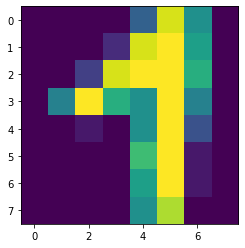

In [21]:
plt.imshow(test)

In [22]:
a = np.array([1,3,5,7,9,11])
b = np.cumsum(a)

In [23]:
b

array([ 1,  4,  9, 16, 25, 36], dtype=int32)

In [24]:
S

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.82253951,  2.39965886, ..., -0.15980632,
         0.09845941, -0.0740206 ],
       [ 0.        ,  2.39965886, 22.59579234, ..., -1.15479735,
         1.41124994,  0.72947431],
       ...,
       [ 0.        , -0.15980632, -1.15479735, ..., 34.79797313,
        15.63983626,  2.87398245],
       [ 0.        ,  0.09845941,  1.41124994, ..., 15.63983626,
        16.72327062,  4.71815884],
       [ 0.        , -0.0740206 ,  0.72947431, ...,  2.87398245,
         4.71815884,  3.45812736]])

In [25]:
w

array([1.78907316e+02, 1.63626641e+02, 1.41709536e+02, 1.01044115e+02,
       6.94744827e+01, 5.90756320e+01, 5.18556662e+01, 4.39906130e+01,
       4.02885629e+01, 3.69912020e+01, 2.85031708e+01, 2.73059660e+01,
       2.18893003e+01, 2.13124899e+01, 1.76269077e+01, 1.69374332e+01,
       1.58425689e+01, 1.49961105e+01, 1.22276649e+01, 1.08808010e+01,
       1.06876155e+01, 9.57726524e+00, 9.22126826e+00, 8.68553268e+00,
       8.36095658e+00, 7.16179198e+00, 6.91588809e+00, 6.18950881e+00,
       5.88171633e+00, 5.15299774e+00, 4.48879723e+00, 4.24451468e+00,
       4.04518650e+00, 3.94120891e+00, 3.70440987e+00, 3.52968776e+00,
       3.08285758e+00, 2.73627648e+00, 2.67062197e+00, 2.54029121e+00,
       2.28171700e+00, 1.90618094e+00, 1.81615447e+00, 1.68902395e+00,
       1.40119202e+00, 1.29149979e+00, 1.15828926e+00, 9.30701800e-01,
       6.69477833e-01, 4.85794730e-01, 2.52210004e-01, 9.90976176e-02,
       6.30956535e-02, 6.07039586e-02, 3.96441561e-02, 1.49422438e-02,
      

In [26]:
def PCA(dataset, m_dim):
    """ Implements PCA on the provided dataset.
    
    Arguments:
        
        dataset - shape n*d
        m_dim - number of principal components
        
    Returns:
    
        dataset_pca - shape m*d
        v - the set of orthogonal basis vectors of the target space
    """
    
    # Finding the covariance matrix
    X = dataset.T
    x_bar = np.mean(X, axis = 1)
    S = (1/X.shape[1])*np.matmul(X-x_bar[:, np.newaxis], (X-x_bar[:, np.newaxis]).T)
    
    # Finding eigenvalues and eigenvectors
    
    w, v = np.linalg.eig(S) # w is the array of eigenvalues, and the columns of v are the corresponding eigenvectors
    
    # Transforming the data to a lower dimension space
    
    Z = np.zeros((m_dim, X.shape[1])) # Z contains the coefficients of the Principal Components
    b = np.zeros((m_dim, 1)) # Bias term
    
    for i in range(X.shape[1]):
        Z[:, i] = np.matmul(X[:, i].T, v[:,:m_dim]).T
        
    b = np.matmul(x_bar.T, v[:, m_dim:]).T[:, np.newaxis]
    
    return Z, b, v

In [27]:
Z, b, v = PCA(dataset, 2)

In [28]:
Z.shape

(2, 1797)

In [29]:
b.shape

(62, 1)

In [30]:
X_tilde = np.zeros_like(X)

In [31]:
X_tilde.shape

(64, 1797)

In [32]:
X_reconstructed = np.zeros_like(X)

In [33]:
X_reconstructed += np.matmul(v[:, :2], Z)

In [34]:
X_reconstructed += np.matmul(v[:, 2:], b)

In [35]:
np.linalg.norm(X-X_reconstructed)

1242.3863212323183

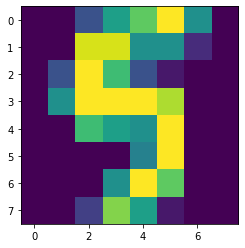

In [36]:
plt.imshow(X[:, 1700].reshape(8,8))

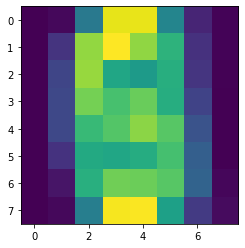

In [37]:
plt.imshow(X_reconstructed[:, 1700].reshape(8,8))

In [38]:
x = X[:, 23]

In [39]:
x.shape

(64,)

In [40]:
x = x[:, np.newaxis]

In [41]:
x.shape

(64, 1)

In [42]:
R = np.ones((2,3))

In [43]:
vector = np.array([3,4])
np.linalg.norm(vector)

5.0

In [44]:
np.sum(w[2:])

858.9447808487351

In [45]:
Z, b, v = PCA(dataset, 8)

In [99]:
def Kmeans(dataset, k):
    """" Implements K-Means Clustering on the provided dataset
    
    Arguments:
    
        dataset - shape n*d
        k - number of clusters
        
    Returns:
    
        mean_vectors - shape d*k
        R - responsibilities - shape n*k
    """   
    X = dataset.T
    R = np.zeros((dataset.shape[0], k)) # Rows of R are the responsibility vectors for each datapoint
    mean_vectors = X[:, :k] # Columns are the mean vectors of each cluster
    
    iterations = 20
    
    for i in range(iterations):
        
        for l in range(X.shape[1]):
            x = X[:, l]
            distances = np.array([np.linalg.norm(x-mean_vectors[:,f]) for f in range(k)])
            cluster = np.argmin(distances)
            r = np.zeros((1, k))
            r[0, cluster] = 1
            R[l, :] = r
            
        for l in range(mean_vectors.shape[1]):
            mean_vectors[:, l] = np.matmul(X, R[:, l])/(np.sum(R[:, l]))
            
    return mean_vectors, R

In [100]:
mean_vectors, R = Kmeans(Z.T, 10)

In [ ]:
R = np.ones((X.shape[1], 10))

In [ ]:
mean_vectors = np.ones((X.shape[0], 10))

In [ ]:
X.shape

In [ ]:
R.shape

In [ ]:
R[:, 4].shape

In [ ]:
R[:, 4][:, np.newaxis].shape

In [ ]:
test = np.matmul(X, R[:, 4])

In [ ]:
test.shape

In [ ]:
test2 = np.sum(R[:, 4])

In [ ]:
test2.shape

In [ ]:
test3 = test/test2

In [ ]:
test3.shape

In [ ]:
mean_vectors[:,4] = test3

In [ ]:
test3.shape

In [ ]:
test = mean_vectors[:,2]
Z8, b8, v8 = PCA(dataset, 8)

In [ ]:
test_reconstructed = np.zeros_like(X[:,1])
test_reconstructed += np.matmul(v[:, :8], test)
test_reconstructed += np.matmul(v[:, 2:], b8)


In [ ]:
test.shape

In [101]:
Z8, b8, v8 = PCA(dataset, 8)
X_reconstructed_8 = np.zeros_like(X)
X_reconstructed_8 += np.matmul(v8[:, :8], Z8)
X_reconstructed_8 += np.matmul(v8[:, 8:], b8)

In [102]:
mean_vectors, R = Kmeans(Z8.T, 10)

In [53]:
R[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
R[5]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
R[100]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
R[121]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
R[1000]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
k=10
cluster = 5

In [ ]:
r = np.zeros((1, k))
r[0, cluster] = 1

In [ ]:
r

In [83]:
k=10
R = np.zeros((dataset.shape[0], k)) # Rows of R are the responsibility vectors for each datapoint
mean_vectors = X[:, :k] # Columns are the mean vectors of each cluster

In [84]:
x = X[:, 2][:, np.newaxis]

In [85]:
x.shape

(64, 1)

In [86]:
distances = np.array([np.linalg.norm(x-mean_vectors[:,f]) for f in range(k)])

In [87]:
distances

array([524.4425612 , 578.67434711, 570.08069604, 534.90933811,
       547.78097813, 574.97130363, 565.03451222, 545.55659651,
       566.66039212, 569.08347367])

In [81]:
X[:,k-1]

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

In [82]:
mean_vectors[:,k-1]

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

In [88]:
np.linalg.norm(x-mean_vectors[:,2])

570.0806960422358

In [95]:
x = X[:, 2]

In [96]:
x

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [97]:
mean_vectors[:,2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [98]:
x-mean_vectors[:,2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
R[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [104]:
R[100]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])